In [1]:
import numpy as np
import tensorflow as tf

train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)
images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)


In [5]:
f_mnist_model = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    tf.keras.layers.Flatten(input_shape=[28, 28]),

    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),

    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [7]:
train_stats = f_mnist_model.fit(train_ds, epochs=10, verbose=1)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.4854 - accuracy: 0.8250
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3659 - accuracy: 0.8666
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3275 - accuracy: 0.8796
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3039 - accuracy: 0.8875
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2850 - accuracy: 0.8950
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2670 - accuracy: 0.8991
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2542 - accuracy: 0.9047
Epoch 8/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2433 - accuracy: 0.9083
Epoch 9/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.2302 - accuracy: 0.9133
Epoch 10/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.

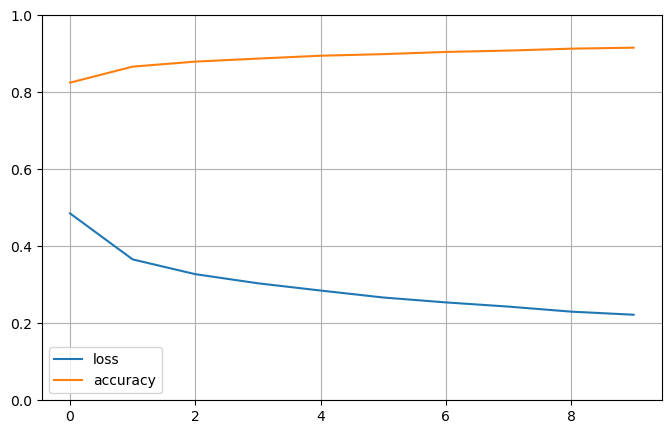

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
y_pred = f_mnist_model.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

188/188 [==============================] - 1s 5ms/step
probs :  [1.1582582e-04 2.9792652e-06 1.4925958e-01 4.0836530e-06 7.7235192e-01
 8.2509851e-13 7.8265414e-02 4.9852149e-12 1.4566315e-07 3.5447661e-10]
klasa : 4
rzeczywista klasa:  2


'\nprobs :  [4.0548810e-15 1.0000000e+00 9.3477974e-17 5.3090128e-13 7.5702587e-15\n 5.9295928e-25 2.1536054e-11 3.4459677e-24 2.8725664e-16 2.4974258e-22]\nklasa : 1\nrzeczywista klasa:  1\n'

In [13]:
# stworzenie wejścia

input = tf.keras.Input(shape=X_train.shape[1:])

# możemy wypisać, co ta warstwa przyjmuje - jest to rozmiar
# naszego obrazka bez batch_size (który ma wartość None)
print(input)

# spłaszczenie wejścia
input_flat = tf.keras.layers.Flatten(input_shape=[28,28])(input)

# nasza kolejna warstwa jest typu Dense, jak poprzednio, ale od razu
# i bezpośrednio przekazujemy jej wejście, tak jak funkcji w Pythonie:
hidden_1 =tf.keras.layers.Dense(320, activation='relu', name="hidden_1")(input_flat)
hidden_2 =tf.keras.layers.Dense(150, activation='relu', name="hidden_2")(hidden_1)

# złączamy wyniki z obu warstw za pomocą warstwy typu Concatenate
concat_layer = tf.keras.layers.Concatenate()([input_flat, hidden_2])
output = tf.keras.layers.Dense(10, activation='softmax')(concat_layer)

# tworzymy model, przekazując mu co ma być naszymi wyjściami, a co wejściami
model_res = tf.keras.Model(inputs=[input], outputs=[output])

# podsumowanie naszego modelu
model_res.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_3 (Flatten)            (None, 784)          0           ['input_3[0][0]']                
                                                                                                  
 hidden_1 (Dense)               (None, 320)          251200      ['flatten_3[0][0]']              
                                                                                                  
 hidden_2 (Dense)               (None, 150)

In [16]:
# kompilacja
model_res.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

#szkolenie na takich samych danych jak poprzednio
train_stats = model_res.fit(train_ds, epochs=30, verbose=1)

Epoch 1/30


1688/1688 [==============================] - 9s 5ms/step - loss: 0.4866 - accuracy: 0.8238
Epoch 2/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3659 - accuracy: 0.8655
Epoch 3/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3274 - accuracy: 0.8789
Epoch 4/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3025 - accuracy: 0.8876
Epoch 5/30
1688/1688 [==============================] - 9s 6ms/step - loss: 0.2824 - accuracy: 0.8950
Epoch 6/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2670 - accuracy: 0.8997
Epoch 7/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2532 - accuracy: 0.9053
Epoch 8/30
1688/1688 [==============================] - 13s 7ms/step - loss: 0.2409 - accuracy: 0.9097
Epoch 9/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2319 - accuracy: 0.9129
Epoch 10/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2212 - ac

In [17]:
y_pred = model_res.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

188/188 [==============================] - 1s 6ms/step
probs :  [9.1779623e-07 5.9606314e-10 5.0515139e-01 9.9084009e-06 4.5510453e-01
 8.3512578e-15 3.9732505e-02 8.5453831e-24 5.9231729e-07 5.4826579e-15]
klasa : 2
rzeczywista klasa:  2


In [ ]:
test_loss, test_accuracy = model_res.evaluate(X_test, y_test, verbose=1)
print(f"\n🔍 Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")

188/188 [==============================] - 1s 6ms/step - loss: 0.4794 - accuracy: 0.8878

🔍 Test Accuracy: 0.8878
📉 Test Loss: 0.4794


: 